References for map plot:

Interactive map plots with Plotly: https://towardsdatascience.com/how-to-create-interactive-map-plots-with-plotly-7b57e889239a

Changed the dataset; customized layout, different color for data analysis and visualization; added different ways of interaction

Mapbox Choropleth Maps in Python: https://plot.ly/python/mapbox-county-choropleth/

Adapted layers from the code

In [1]:
import plotly.plotly as py
import plotly.graph_objs as go
import plotly
import pandas as pd
import numpy as np

# setting user, api key and access token
plotly.tools.set_credentials_file(username='WendyLiang', api_key='0Mqn1LRKjujs81acpAGt')
mapbox_access_token = 'pk.eyJ1Ijoid2VuZHlsaWFuZyIsImEiOiJjandhZGVzd3cwOHU0NGFuMHBzdHJvNHdhIn0.15zho30YkMBcHvlAVx4J9w'

# load data
df = pd.read_csv('./data/UNESCO.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2722 entries, 0 to 2721
Data columns (total 17 columns):
Unnamed: 0                     2722 non-null int64
ID                             2722 non-null int64
Name in English                2722 non-null object
Name in French                 2699 non-null object
Name in Spanish                2701 non-null object
Countries                      2721 non-null object
Country codes alpha 3          2721 non-null object
ISO639-3 codes                 2458 non-null object
Degree of endangerment         2722 non-null object
Alternate names                1583 non-null object
Name in the language           27 non-null object
Number of speakers             2539 non-null float64
Sources                        2079 non-null object
Latitude                       2719 non-null float64
Longitude                      2719 non-null float64
Description of the location    1870 non-null object
language family                2722 non-null object
dtypes: fl

In [2]:
# drop rows with no coordinate info
df = df[pd.notnull(df['Latitude'])]
df = df[pd.notnull(df['Countries'])]

# drop informations that we don't need
df = pd.DataFrame({'Name in English': df['Name in English'],
                   'Countries': df['Countries'],
                   'Country codes alpha 3': df['Country codes alpha 3'],
                   'Degree of endangerment': df['Degree of endangerment'],
                   'Number of speakers': df['Number of speakers'],
                   'Latitude': df['Latitude'],
                   'Longitude': df['Longitude']
})

df.head()

,Name in English,Countries,Country codes alpha 3,Degree of endangerment,Number of speakers,Latitude,Longitude
0,South Italian,Italy,ITA,Vulnerable,7500000.0,40.9798,15.2490
1,Sicilian,Italy,ITA,Vulnerable,5000000.0,37.4399,14.5019
2,Low Saxon,"Germany, Denmark, Netherlands, Poland, Russian...","DEU, DNK, NLD, POL, RUS",Vulnerable,4800000.0,53.4029,10.3601
3,Belarusian,"Belarus, Latvia, Lithuania, Poland, Russian Fe...","BRB, LVA, LTU, POL, RUS, UKR",Vulnerable,4000000.0,53.9560,27.5756
4,Lombard,"Italy, Switzerland","ITA, CHE",Definitely endangered,3500000.0,45.7215,9.3273


Data Visualization with Map Plot

In [3]:
# there are five level of endangerment in the data
degrees = ['Vulnerable', 'Definitely endangered', 'Severely endangered', 'Critically endangered', 'Extinct']

# represent each degree of endangerment with a different color
# colors = ["rgba(0,255,255,1)", "rgba(0,250,154,1)", "rgba(255,215,0,1)", "rgba(255,140,0,1)", "rgba(255,69,0,1)"]
colors = ["rgb(81,235,147)", "rgb(81,112,235)", "rgb(209,81,235)", "rgb(235,81,81)", "rgb(47,60,60)"]

In [4]:
# put data of the plot in a dictionary
data = []
for i in range(len(degrees)):
    degree = degrees[i]
    degree_data = go.Scattermapbox(
        # we need coordinate, endangerment level and name of the languages
        lat = df.loc[df['Degree of endangerment'] == degree, 'Latitude'],
        lon = df.loc[df['Degree of endangerment'] == degree, 'Longitude'],
        text = df.loc[df['Degree of endangerment'] == degree, ['Name in English', 'Number of speakers']],
        mode = 'markers',
        marker = go.scattermapbox.Marker(
            # size and color of each dot
            size = 8,
            opacity = 1,
            color = colors[i]
        ),
        name = degree,
        # display name of the language when hover over
        hoverinfo = 'text',
        type = 'scattermapbox'
    )
    data.append(degree_data)

In [5]:
# layout of the map
layout = go.Layout(
    height = 800,
    # top, bottom, left and right margins
    margin = dict(t = 1.5, b = 1, l = 1, r = 1),
    font = dict(color = '#000000', size = 11),
    paper_bgcolor = '#FFFFFF',
    mapbox = dict(
        accesstoken = mapbox_access_token,
        bearing = 0,
        # center the map at the US at beginning
        center = dict(
            lat = 38,
            lon = -94
        ),
        pitch = 0, # set the map to be "parallel" to our screen, with no angle
        zoom = 3, # default level of zoom
        style = 'light' # default map style
    )
)

In [6]:
# relayout the map when different continents are selected
# center the map on the coresponsing continent
# color the continent area in dark gray
# Africa
center_africa = dict(
    lat = 9,
    lon = 35
)
layers_africa = [dict(
    sourcetype = 'geojson',
    source = 'https://raw.githubusercontent.com/wendyrliang/Endangered_Languages/master/data/africa.json?token=AJWK76ZRV6JFOSIZOHPADV25ACL7Q',
    type = 'fill',
    color = 'rgba(96,96,96,0.4)',
    below = 'state-label-sm'
)]
    
# Asia
center_asia = dict(
    lat = 34,
    lon = 101
)
layers_asia = [dict(
    sourcetype = 'geojson',
    source = 'https://raw.githubusercontent.com/wendyrliang/Endangered_Languages/master/data/asia.json?token=AJWK767HG4ADK4YDPYVHOPS5ACMBS',
     type = 'fill',
    color = 'rgba(96,96,96,0.4)',
    below = 'state-label-sm'
)]

# Europe
center_europe = dict(
    lat = 55,
    lon = 15
)
layers_europe = [dict(
    sourcetype = 'geojson',
    source = 'https://raw.githubusercontent.com/wendyrliang/Endangered_Languages/master/data/europe.json?token=AJWK7673N5BGJPICCPMKU3S5ACMFA',
    type = 'fill',
    color = 'rgba(96,96,96,0.4)',
    below = 'state-label-sm'
)]

# North America
center_namerica = dict(
    lat = 54,
    lon = -105
)
layers_namerica = [dict(
    sourcetype = 'geojson',
    source = 'https://raw.githubusercontent.com/wendyrliang/Endangered_Languages/master/data/n_america.json?token=AJWK767XOGIMWSQGQGA5XRC5ACMH2',
    type = 'fill',
    color = 'rgba(96,96,96,0.4)',
    below = 'state-label-sm'
)]

# South America
center_samerica = dict(
    lat = 9,
    lon = -55
)
layers_samerica = [dict(
    sourcetype = 'geojson',
    source = 'https://raw.githubusercontent.com/wendyrliang/Endangered_Languages/master/data/s_america.json?token=AJWK762IMJASUEGB7W5DJSK5ACMLQ',
    type = 'fill',
    color = 'rgba(96,96,96,0.4)',
    below = 'state-label-sm'
)]

# Oceania
center_oceania = dict(
    lat = -23,
    lon = 140
)
layers_oceania = [dict(
    sourcetype = 'geojson',
    source = 'https://raw.githubusercontent.com/wendyrliang/Endangered_Languages/master/data/oceania.json?token=AJWK762FSEKMZGAHEJTM7GC5ACMNM',
    type = 'fill',
    color = 'rgba(96,96,96,0.4)',
    below = 'state-label-sm'
)]

In [7]:
# dorp-downs for visulization
updatemenus=list([
    # drop-down 1: select different degrees to visualize
    dict(
         buttons=list([
            dict(label = 'All Degrees',
                 method = 'update',
                 args = [{'visible': [True, True, True, True, True]}]),
            dict(label = 'Vulnerable',
                 method = 'update',
                 args = [{'visible': [True, False, False, False, False]}]),
            dict(label = 'Definitely Endangered',
                 method = 'update',
                 args = [{'visible': [False, True, False, False, False]}]),
             dict(label = 'Severely Endangered',
                 method = 'update',
                 args = [{'visible': [False, False, True, False, False]}]),
             dict(label = 'Critically Endangered',
                 method = 'update',
                 args = [{'visible': [False, False, False, True, False]}]),
             dict(label = 'Extinct',
                 method = 'update',
                 args = [{'visible': [False, False, False, False, True]}])
             
        ]),
        # direction where the drop-down expands when opened
        direction = 'down',
        # positional arguments
        x = 0.01,
        xanchor = 'left',
        y = 0.99,
        yanchor = 'bottom',
        # fonts and border
        bgcolor = '#FFFFFF',
        bordercolor = '#000000',
        font = dict(size=11)
    ),
    
    # drop-down 2: select different continent
    dict(
        buttons = list([
            dict(
                label = 'North America',
                method = 'relayout',
                args = [{
                    'mapbox.center' : center_namerica,
                    'mapbox.layers' : layers_namerica,
                    'mapbox.zoom' : 2
                }]
            ),
            dict(
                label = 'South America',
                method = 'relayout',
                args = [{
                    'mapbox.center' : center_samerica,
                    'mapbox.layers' : layers_samerica,
                    'mapbox.zoom' : 2
                }]
            ),
            dict(
                label = 'Asia',
                method = 'relayout',
                args = [{
                    'mapbox.center' : center_asia,
                    'mapbox.layers': layers_asia,
                    'mapbox.zoom' : 2
                }]
            ),
            dict(
                label = 'Africa',
                method = 'relayout',
                args = [{
                    'mapbox.center' : center_africa,
                    'mapbox.layers' : layers_africa,
                    'mapbox.zoom' : 2
                }]
            ),
            dict(
                label = 'Europe',
                method = 'relayout',
                args = [{
                    'mapbox.center' : center_europe,
                    'mapbox.layers' : layers_europe,
                    'mapbox.zoom' : 2
                }]
            ),
            dict(
                label = 'Oceania',
                method = 'relayout',
                args = [{
                    'mapbox.center' : center_oceania,
                    'mapbox.layers' : layers_oceania,
                    'mapbox.zoom' : 2
                }]
            )
        ]),
        # direction where I want the menu to expand when I click on it
        direction = 'up',
      
        # here I specify where I want to place this drop-down on the map
        x = 0.80,
        xanchor = 'left',
        y = 0.05,
        yanchor = 'bottom',
      
        # specify font size and colors
        bgcolor = '#FFFFFF',
        bordercolor = '#000000',
        font = dict(size=11)
    )
])

# assign the list of dictionaries to the global layout dictionary
layout['updatemenus'] = updatemenus

In [8]:
# display mapy name
annotations = [dict(
              text = 'Endangered Languages around the World',
              font = dict(color = '#000000', size = 14), borderpad = 10,
              x = 0.05, y = 0.05, xref = 'paper', yref = 'paper', align = 'left',
              showarrow = False, bgcolor = '#FFFFFF'
              )]

# assigning the annotations to the layout
layout['annotations'] = annotations

In [9]:
fig = go.Figure(data=data, layout=layout)
py.iplot(fig, filename='Global_EL_degree')

/usr/local/lib/python3.7/site-packages/IPython/core/display.py:689: UserWarning:

Consider using IPython.display.IFrame instead



In [10]:
plotly.offline.plot(fig, filename='Global_EL_degree', auto_open=False)

/usr/local/lib/python3.7/site-packages/plotly/offline/offline.py:524: UserWarning:

Your filename `Global_EL_degree` didn't end with .html. Adding .html to the end of your file.



'Global_EL_degree.html'

Data Analysis

In [11]:
import numpy as np
import matplotlib.pyplot as plt

In [12]:
# count number of endangered languages for each degree of endangerment
# only count unique name of languages
degree = df.groupby('Degree of endangerment')['Name in English'].nunique()
degree

Degree of endangerment
Critically endangered    606
Definitely endangered    677
Extinct                  252
Severely endangered      554
Vulnerable               627
Name: Name in English, dtype: int64

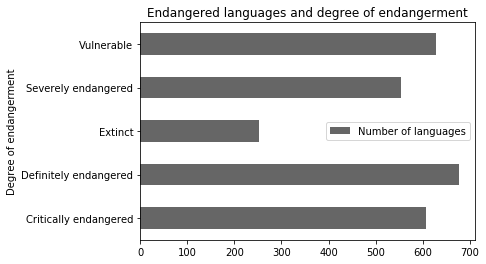

In [20]:
# create a bar plot for different degree of endangerment
plt.figure()
degree_bar = degree.plot.barh(x = 'Degree of endangerment', color='k', alpha=0.6)
degree_bar.legend(["Number of languages"])
plt.title('Endangered languages and degree of endangerment')
# Saving the bar plot as pdf file
# plt.savefig('degree_bar.pdf')

In [14]:
# replace degree of endangerment with numbers to study
# the correlation between degree of endangerment and number of speakers
mapping = {'Vulnerable': 1,
           'Definitely endangered': 2,
           'Severely endangered': 3,
           'Critically endangered': 4,
           'Extinct': 5}
number = df.replace({'Degree of endangerment' : mapping})
number.head()

,Name in English,Countries,Country codes alpha 3,Degree of endangerment,Number of speakers,Latitude,Longitude
0,South Italian,Italy,ITA,1,7500000.0,40.9798,15.2490
1,Sicilian,Italy,ITA,1,5000000.0,37.4399,14.5019
2,Low Saxon,"Germany, Denmark, Netherlands, Poland, Russian...","DEU, DNK, NLD, POL, RUS",1,4800000.0,53.4029,10.3601
3,Belarusian,"Belarus, Latvia, Lithuania, Poland, Russian Fe...","BRB, LVA, LTU, POL, RUS, UKR",1,4000000.0,53.9560,27.5756
4,Lombard,"Italy, Switzerland","ITA, CHE",2,3500000.0,45.7215,9.3273


In [15]:
# drop all null number of speakers
number = number[pd.notnull(df['Number of speakers'])]
number.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2535 entries, 0 to 2538
Data columns (total 7 columns):
Name in English           2535 non-null object
Countries                 2535 non-null object
Country codes alpha 3     2535 non-null object
Degree of endangerment    2535 non-null int64
Number of speakers        2535 non-null float64
Latitude                  2535 non-null float64
Longitude                 2535 non-null float64
dtypes: float64(3), int64(1), object(3)
memory usage: 158.4+ KB


In [16]:
# convert Number of speakers to int
number['Number of speakers'] = number['Number of speakers'].astype(int)
number.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2535 entries, 0 to 2538
Data columns (total 7 columns):
Name in English           2535 non-null object
Countries                 2535 non-null object
Country codes alpha 3     2535 non-null object
Degree of endangerment    2535 non-null int64
Number of speakers        2535 non-null int64
Latitude                  2535 non-null float64
Longitude                 2535 non-null float64
dtypes: float64(2), int64(2), object(3)
memory usage: 158.4+ KB


<Figure size 432x288 with 0 Axes>

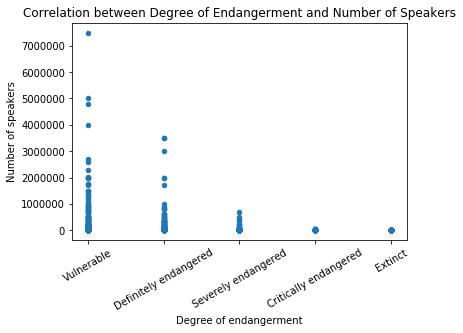

In [18]:
# scatter plot
plt.figure()
number_scatter = number.plot.scatter(x = 'Degree of endangerment', y = 'Number of speakers')
plt.xticks(np.arange(1, 6),('Vulnerable', 'Definitely endangered', 'Severely endangered', 'Critically endangered', 'Extinct'), rotation =30)
plt.title('Correlation between Degree of Endangerment and Number of Speakers')
# Saving the bar plot as pdf file
# plt.savefig('degree_number.pdf')